In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate 4th degree polynomial data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 3 - 2 * X + 0.1 * X**2 - 0.2 * X**3 + 0.1 * X**4 + np.random.randn(100, 1) * 3

In [71]:
df = pd.DataFrame({'concentration':X.flatten(),'reaction':y.flatten()})
df.to_csv('../datasets/reactions.csv')

In [67]:
# Fit a polynomial regression line of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [68]:
# Predict using the polynomial regression model
X_range = np.linspace(0, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

In [78]:
coefficients = model.coef_
powers = poly.powers_
coefficients, powers

(array([[ 0.        ,  3.61438901, -4.38480775,  1.02065964, -0.01053095]]),
 array([[0],
        [1],
        [2],
        [3],
        [4]]))

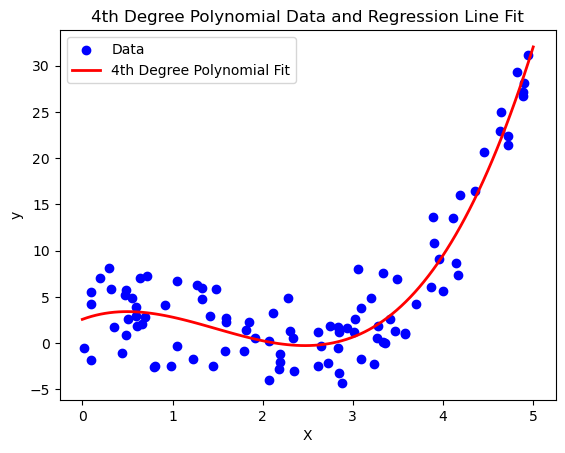

In [69]:

# Plot data and the regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_pred, color='red', linewidth=2, label='4th Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('4th Degree Polynomial Data and Regression Line Fit')
plt.legend()
plt.show()

R-squared (Legendre): 0.8689702377525662
Mean Squared Error (Legendre): 8.39672340744322


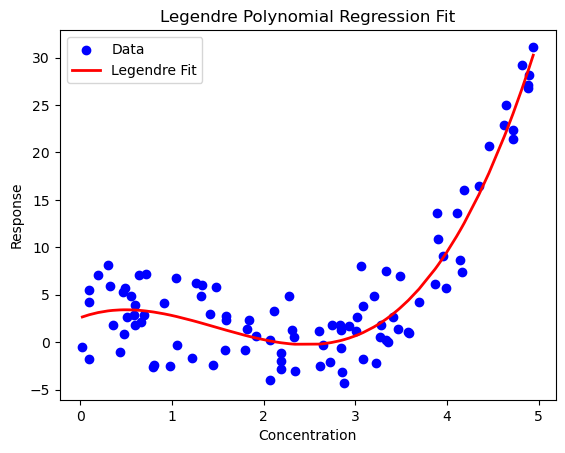

Legendre coefficients: [[ 0.          8.34847298 11.18024272  5.44970226 -0.08803634]]


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from numpy.polynomial.legendre import Legendre

# Step 1: Standardize the input data 'concentration' to [-1, 1]
# Assuming `data` is a DataFrame containing the column 'concentration'
X = df["concentration"].values
X_standardized = 2 * (X - X.min()) / (X.max() - X.min()) - 1  # scale to [-1, 1]

# Step 2: Generate Legendre polynomial features
degree = 4  # Assuming you want to use a 4th-degree Legendre polynomial
legendre_features = [Legendre.basis(d)(X_standardized) for d in range(degree + 1)]

# Stack the features into a design matrix
X_legendre = np.column_stack(legendre_features)

# Step 3: Fit a linear regression model using Legendre polynomial features
model_legendre = LinearRegression()
model_legendre.fit(X_legendre, y)

# Make predictions
y_pred_legendre = model_legendre.predict(X_legendre)

# Evaluate the model
r2_legendre = r2_score(y, y_pred_legendre)
mse_legendre = mean_squared_error(y, y_pred_legendre)

print("R-squared (Legendre):", r2_legendre)
print("Mean Squared Error (Legendre):", mse_legendre)

# Optional: Plot the predictions
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_legendre, color='red', linewidth=2, label='Legendre Fit')
plt.xlabel('Concentration')
plt.ylabel('Response')
plt.title('Legendre Polynomial Regression Fit')
plt.legend()
plt.show()

# Extract the coefficients
print("Legendre coefficients:", model_legendre.coef_)


In [81]:
X_vif = pd.DataFrame(X_legendre, columns=[f'P_{i}' for i in range(X_legendre.shape[1])])

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

  Feature       VIF
0     P_0  1.022956
1     P_1  1.055790
2     P_2  1.037059
3     P_3  1.024228
4     P_4  1.039940


In [86]:
X_vif = pd.DataFrame(X_poly, columns=[f'P_{i}' for i in range(5)])
X_vif

,P_0,P_1,P_2,P_3,P_4
0,1.0,0.023477,0.000551,0.000013,3.038076e-07
1,1.0,0.093949,0.008826,0.000829,7.790560e-05
2,1.0,0.100538,0.010108,0.001016,1.021683e-04
3,1.0,0.101092,0.010220,0.001033,1.044400e-04
4,1.0,0.195939,0.038392,0.007523,1.473952e-03
...,...,...,...,...,...
95,1.0,4.818314,23.216148,111.862686,5.389895e+02
96,1.0,4.882297,23.836827,116.378478,5.681943e+02
97,1.0,4.883805,23.851556,116.486357,5.688967e+02
98,1.0,4.893092,23.942346,117.152097,5.732360e+02
